<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/magdiplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [41]:
def resizeImage(width, height, image):
  down_points = (width, height)
  return cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

In [43]:
# image = cv2.imread('/content/drive/MyDrive/diplom/photos/IMG_1772_016.jpg')
all_img_paths = glob.glob("/content/drive/MyDrive/diplom/photos/doors/*.jpg")
path = '/content/drive/MyDrive/diplom/readyImg/door/'
i=0
for img_path in all_img_paths:
  # print(img_path)
  img = cv2.imread(img_path)
  img300 = resizeImage(300,300,img)
  imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=60, sigma_r=0.4)
  imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
  imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
  img64 = resizeImage(64,64,imgLap)
  # cv2_imshow(img64)
  cv2.imwrite(os.path.join(path , 'door'+str(i)+'.jpg'), img64)
  i+=1

In [72]:
DATADIR = "/content/drive/MyDrive/diplom/readyImg/"

LABELS = ["stair", "door"]

X_TRAIN = []
Y_TRAIN = []

IMG_SIZE = 64
for category in LABELS:
    path = os.path.join(DATADIR, category)
    class_num = LABELS.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            X_TRAIN.append(new_array)
            Y_TRAIN.append(class_num)
        except Exception as e:
            pass

X_TRAIN = np.array(X_TRAIN).reshape(-1, IMG_SIZE, IMG_SIZE,1)
# X_TRAIN = np.array(X_TRAIN)
Y_TRAIN = np.array(Y_TRAIN)
X_TRAIN = X_TRAIN/255

In [73]:
print(len(X_TRAIN))
print(len(Y_TRAIN))
#print(X_TRAIN)

689
689


In [74]:
model = models.Sequential()
# model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(32, 32,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(64, (5, 5), activation='relu',padding='same' ,input_shape=(16, 16,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(2))
model.add(layers.Activation("softmax"))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d_81 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 activation_71 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_76 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_82 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 activation_72 (Activation)  (None, 16, 16, 32)      

In [75]:
history = model.fit(X_TRAIN,Y_TRAIN, epochs=10, validation_split=0.1)
print('\nhistory dict:', history.history)

Epoch 1/10
20/20 [==============================] - 8s 340ms/step - loss: 0.2567 - accuracy: 0.8806 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 8s 376ms/step - loss: 0.0246 - accuracy: 0.9952 - val_loss: 2.3656e-04 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 5s 268ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 8s 386ms/step - loss: 2.6057e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 6s 296ms/step - loss: 1.4862e-04 - accuracy: 1.0000 - val_loss: 5.2905e-04 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 5s 266ms/step - loss: 1.1380e-04 - accuracy: 1.0000 - val_loss: 3.8615e-04 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 8s 433ms/step - loss: 9.4191e-05 - accuracy: 1.0000 - val_loss: 3.5806e-

1/1 [==============================] - 0s 432ms/step
[[1. 0.]
 [1. 0.]
 [1. 0.]]
stair


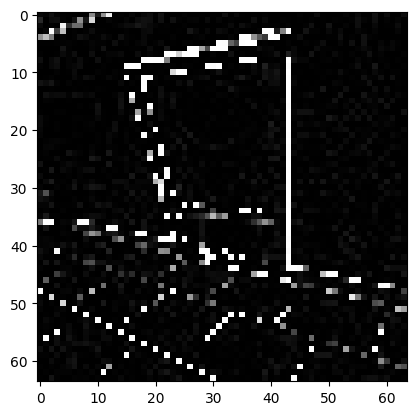

In [77]:
import matplotlib.pyplot as plt
TESTDIR = "/content/drive/MyDrive/diplom/test/"
for img in os.listdir(TESTDIR):
    try:
        img_array = cv2.imread(os.path.join(TESTDIR, img))
        new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        new_shape = new_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        predictions = model.predict(new_shape)
        plt.imshow(new_img)
        print(predictions)
        print(LABELS[np.argmax(predictions)])
    except Exception as e:
        pass